## **EDA ON Air BNB Dataset**

---



---



---



  Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today Airbnb became one of a kind service that is used and recognized by the whole world, Data Analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be ananysed and used for security, business decisions, understanding of customers and providers (hosts) behaviour and performance on the platform, guiding marketing initiatives, implimentation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.


# Let us Explore and analyse the data

In [ ]:
#Import necessary libraries such as Pandas, Numpy and Matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Load the data set file from drive by using copying it's file path.

filepath='/content/drive/MyDrive/Colab Notebooks/AlmaBetter/01 PYTHON FOR DATA SCIENCE/04 Data Visualization & CAPSTONE PROJECT/Airbnb NYC 2019.csv'

In [ ]:
# Convert the data set into Dataframe 
df=pd.read_csv(filepath)

In [ ]:
df.shape

(48895, 16)

In [ ]:
# Info() operation gives preliminary information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Creating Desired Dataframe with useful columns for analysis 
# Preperation of dataframe by eliminating null values containing observations using .dropna() method

airbnbdf= df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price',
          
         'minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365' ]].dropna()

In [ ]:
airbnbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [ ]:
airbnbdf.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **1. Which of the group(s) is/are rich in having highest listings?**

In [ ]:
# Using Groupby Function

host_areas = airbnbdf.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()

In [ ]:
host_areas_count= host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(10)
host_areas_count

,host_name,neighbourhood_group,calculated_host_listings_count
13214,Sonder (NYC),Manhattan,327
1832,Blueground,Brooklyn,232
1833,Blueground,Manhattan,232
7273,Kara,Manhattan,121
7476,Kazuya,Brooklyn,103
7477,Kazuya,Manhattan,103
7478,Kazuya,Queens,103
6538,Jeremy & Laura,Manhattan,96
13213,Sonder,Manhattan,96
2900,Corporate Housing,Manhattan,91


<BarContainer object of 15340 artists>

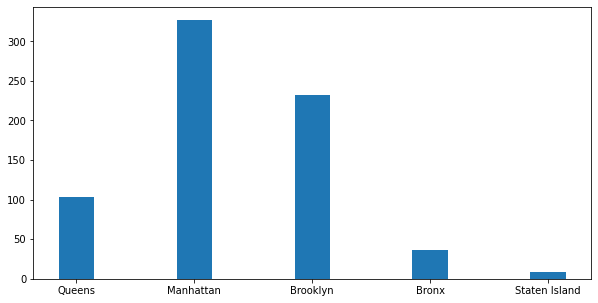

In [ ]:
# 1. Graphical Repreaentation 
fig=plt.figure(figsize=(10,5))
plt.bar(host_areas['neighbourhood_group'],host_areas['calculated_host_listings_count'], width=0.3)

# *From the above graph, it is very that the neighbourhood group "Manhattan" is topped by having highest number of listings, where the group " Staten Island" is taken least position.*

# **2. What is the average price range in each type of room?**

In [ ]:
airbnbdf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
# Using Groupby Function

avg_price = airbnbdf.groupby(['neighbourhood_group','room_type'],as_index=False)['price'].mean()

In [ ]:
# Rename the column names for simplification

avg_price= avg_price.rename(columns={'price':'Avg_price','neighbourhood_group':'Location'})
avg_price.head(5)

,Location,room_type,Avg_price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619


In [ ]:
# Using Unstack() results the data in each type of room 

avg_room_wise_price = airbnbdf.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_room_wise_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


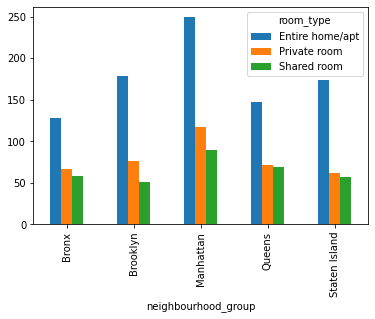

In [ ]:
# 2.Graphical Repreaentation 
avg_room_wise_price.plot.bar()

# "Manhattan" is the group, which is very expensive in all types of rooms compare to other groups.

In Shared room Category, Brooklyn offers at cheap price.

Queens group is very economical when comes to Private room.

In entire room/apt category, Manhattan is costlier and Bronx group offers at less cost.

#  **3. Which group has highest number of hosts?**

In [ ]:
Highest_Hosts= airbnbdf.groupby(['neighbourhood_group'],as_index=False)['host_id'].count().sort_values(['host_id'], ascending = False)
Highest_Hosts

,neighbourhood_group,host_id
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


In [ ]:
No_of_highest_hosts_per_location= airbnbdf.groupby('neighbourhood_group')['host_id'].count()

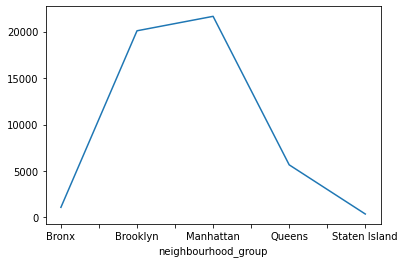

In [ ]:
No_of_highest_hosts_per_location.plot()

# Manhattan having 21643 unique hosts, where Brooklyn having 20089 hosts. Here we can observe that there is slight difference with no. of unique hosts between Manhattan and Brooklyn Group.

# 4. Which group is most reviewed one?

In [ ]:
Most_reviewed_areas = airbnbdf.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
Most_reviewed_areas = Most_reviewed_areas.sort_values(['number_of_reviews'], ascending = False).head()
Most_reviewed_areas

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


Text(0.5, 1.0, 'Most reviewed Areas')

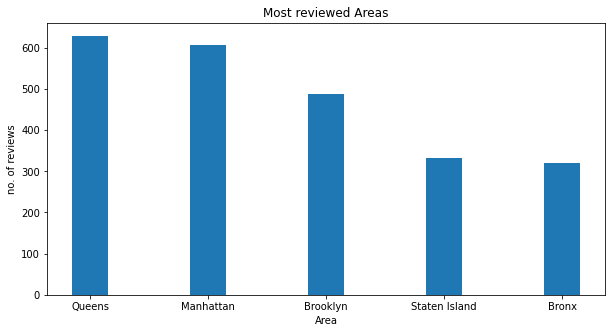

In [ ]:
# 4. Graphical Representation
fig=plt.figure(figsize =(10,5))
plt.bar(Most_reviewed_areas['neighbourhood_group'],Most_reviewed_areas['number_of_reviews'], width = 0.3)
plt.xlabel('Area')
plt.ylabel('no. of reviews')
plt.title('Most reviewed Areas')

## Here we observe that The Queen Group is reviewed well compared to other groups.

# **5. Which Host is the busiest one with more reviews?**

In [ ]:
# Using Groupby 

Busy_Hosts=airbnbdf.groupby(['host_id','host_name','neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()

In [ ]:
Busy_Hosts= Busy_Hosts.sort_values(['number_of_reviews'], ascending =False).head(10)
Busy_Hosts 

,host_id,host_name,neighbourhood_group,room_type,number_of_reviews
24523,47621202,Dona,Queens,Private room,629
7717,4734398,Jj,Manhattan,Private room,607
22246,37312959,Maya,Queens,Private room,543
4598,2369681,Carol,Manhattan,Private room,540
19477,26432133,Danielle,Queens,Private room,510
13731,12949460,Asa,Brooklyn,Entire home/apt,488
1976,792159,Wanda,Brooklyn,Private room,480
5064,2680820,Linda,Queens,Private room,474
161,42273,Dani,Brooklyn,Entire home/apt,467
18321,23591164,Angela,Queens,Private room,466


Text(0, 0.5, 'No of Reviews')

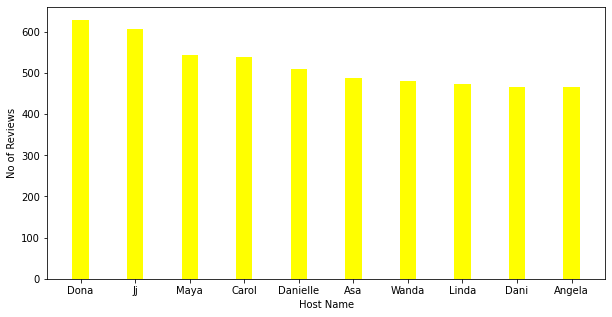

In [ ]:
# 5. Graphical Representation
fig=plt.figure(figsize =(10,5))
plt.bar(Busy_Hosts['host_name'],Busy_Hosts['number_of_reviews'], color=('yellow'),
        width=0.3)
plt.xlabel('Host Name')
plt.ylabel('No of Reviews')

## Dona  of Queens Group has highest reviews 629, followed by Jj of Manhattan with 607.

# **6. Which Are group is preferred by Tourists (i.e those who stay more nights)?**

In [ ]:
# Using Groupby

tourist_stays= airbnbdf.groupby(['room_type','neighbourhood_group'])['minimum_nights'].count().reset_index()
tourist_stays= tourist_stays.sort_values(['minimum_nights'], ascending =False)

In [ ]:
tourist_stays

,room_type,neighbourhood_group,minimum_nights
2,Entire home/apt,Manhattan,13190
6,Private room,Brooklyn,10123
1,Entire home/apt,Brooklyn,9553
7,Private room,Manhattan,7973
8,Private room,Queens,3370
3,Entire home/apt,Queens,2096
5,Private room,Bronx,652
12,Shared room,Manhattan,480
11,Shared room,Brooklyn,413
0,Entire home/apt,Bronx,378


Text(0.5, 1.0, 'No. of Night Stays vs Room Type')

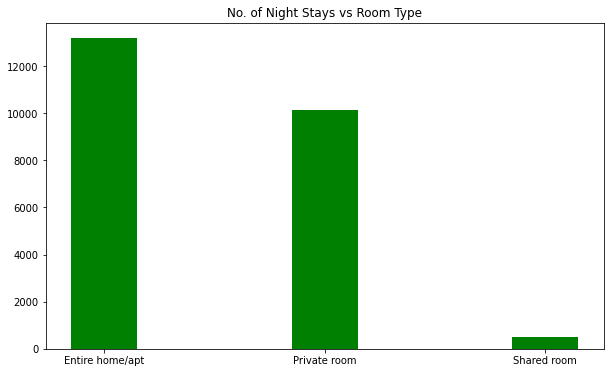

In [ ]:
# 6. Graphical Representation

fig= plt.figure(figsize=(10,6))
plt.bar(tourist_stays['room_type'],tourist_stays['minimum_nights'], color=('green'), width =0.3)
plt.title('No. of Night Stays vs Room Type')

Text(0.5, 1.0, 'No. of Night Stays vs neighbourhood_group')

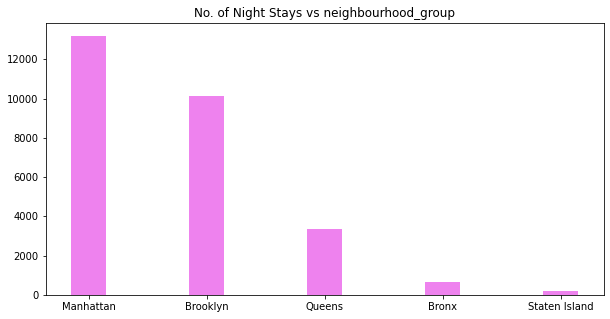

In [ ]:
# 7. Graphical Representation

fig= plt.figure(figsize=(10,5))
plt.bar(tourist_stays['neighbourhood_group'],tourist_stays['minimum_nights'], color=('violet'), width =0.3)
plt.title('No. of Night Stays vs neighbourhood_group')

# Entire room/ apt and Private rooms are more preferred for staying more nights.
# And Manhattan is the best location to stay for more nights.

## **Conclusion**